In [1]:
import pandas as pd
BHNames= ['crim','zn','indus','chas','nox','rm',
         'age','dis','rad','tax','ptratio','black','lstat','medv']


url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
data = pd.read_csv(url, delim_whitespace=True, names=BHNames)

print(data.head(20))
print(data.info())

'''
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s'''

       crim    zn  indus  chas    nox     rm    age     dis  rad    tax  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

'\nCRIM: Per capita crime rate by town\nZN: Proportion of residential land zoned for lots over 25,000 sq. ft\nINDUS: Proportion of non-retail business acres per town\nCHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX: Nitric oxide concentration (parts per 10 million)\nRM: Average number of rooms per dwelling\nAGE: Proportion of owner-occupied units built prior to 1940\nDIS: Weighted distances to five Boston employment centers\nRAD: Index of accessibility to radial highways\nTAX: Full-value property tax rate per $10,000\nPTRATIO: Pupil-teacher ratio by town\nB: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town\nLSTAT: Percentage of lower status of the population\nMEDV: Median value of owner-occupied homes in $1000s'

In [2]:
#To Scale data from 0 to 1 apply preprocessing Mms!
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(data))
DataScaled = scaler.fit_transform(data)
DataScaled = pd.DataFrame(DataScaled, columns=BHNames)

summary = DataScaled.describe()
summary = summary.transpose()
print(summary)

MinMaxScaler()
         count      mean       std  min       25%       50%       75%  max
crim     506.0  0.040544  0.096679  0.0  0.000851  0.002812  0.041258  1.0
zn       506.0  0.113636  0.233225  0.0  0.000000  0.000000  0.125000  1.0
indus    506.0  0.391378  0.251479  0.0  0.173387  0.338343  0.646628  1.0
chas     506.0  0.069170  0.253994  0.0  0.000000  0.000000  0.000000  1.0
nox      506.0  0.349167  0.238431  0.0  0.131687  0.314815  0.491770  1.0
rm       506.0  0.521869  0.134627  0.0  0.445392  0.507281  0.586798  1.0
age      506.0  0.676364  0.289896  0.0  0.433831  0.768280  0.938980  1.0
dis      506.0  0.242381  0.191482  0.0  0.088259  0.188949  0.369088  1.0
rad      506.0  0.371713  0.378576  0.0  0.130435  0.173913  1.000000  1.0
tax      506.0  0.422208  0.321636  0.0  0.175573  0.272901  0.914122  1.0
ptratio  506.0  0.622929  0.230313  0.0  0.510638  0.686170  0.808511  1.0
black    506.0  0.898568  0.230205  0.0  0.945730  0.986232  0.998298  1.0
lstat    5

In [3]:
from sklearn.model_selection import train_test_split

X = DataScaled.drop('medv', axis = 1)
print('X shape = ',X.shape)
Y = DataScaled['medv']
print('Y shape = ',Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)
print('X train shape = ',X_train.shape)
print('X test shape = ', X_test.shape)
print('Y train shape = ', Y_train.shape)
print('Y test shape = ',Y_test.shape)

X shape =  (506, 13)
Y shape =  (506,)
X train shape =  (354, 13)
X test shape =  (152, 13)
Y train shape =  (354,)
Y test shape =  (152,)


In [4]:
#import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

#first input and first hidden layer
model = Sequential()
model.add(Dense(20,input_dim=13, activation='relu'))

#second hidden layer
model.add(Dense(10, activation='relu'))

#output layer
model.add(Dense(1, activation='linear'))

#compile ANN
model.compile(optimizer="Adam", loss='mean_squared_error', metrics=['accuracy'])

Using TensorFlow backend.


In [5]:
#fit and display the summary 
model.fit(X_train,Y_train, epochs=1000, verbose=1)

Epoch 1/1000
354/354 [==============================] - 0s 384us/step - loss: 0.1735 - accuracy: 0.0056
Epoch 2/1000
354/354 [==============================] - 0s 56us/step - loss: 0.1107 - accuracy: 0.0113
Epoch 3/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0819 - accuracy: 0.0113
Epoch 4/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0624 - accuracy: 0.0085
Epoch 5/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0505 - accuracy: 0.0085
Epoch 6/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0437 - accuracy: 0.0113
Epoch 7/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0397 - accuracy: 0.0141
Epoch 8/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0369 - accuracy: 0.0141
Epoch 9/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0342 - accuracy: 0.0141
Epoch 10/1000
354/354 [==============================] - 0s 68us/step - 

354/354 [==============================] - 0s 45us/step - loss: 0.0074 - accuracy: 0.0254
Epoch 80/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0077 - accuracy: 0.0254
Epoch 81/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0075 - accuracy: 0.0254
Epoch 82/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0074 - accuracy: 0.0254
Epoch 83/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0072 - accuracy: 0.0254
Epoch 84/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0070 - accuracy: 0.0254
Epoch 85/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0071 - accuracy: 0.0254
Epoch 86/1000
354/354 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.03 - 0s 45us/step - loss: 0.0070 - accuracy: 0.0254
Epoch 87/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0070 - accuracy: 0.0254
Epoch 88/1000
354/354 [=============

354/354 [==============================] - 0s 45us/step - loss: 0.0067 - accuracy: 0.0254
Epoch 157/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0058 - accuracy: 0.0254
Epoch 158/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0052 - accuracy: 0.0254
Epoch 159/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0054 - accuracy: 0.0254
Epoch 160/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0053 - accuracy: 0.0254
Epoch 161/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0052 - accuracy: 0.0254
Epoch 162/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0051 - accuracy: 0.0254
Epoch 163/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0051 - accuracy: 0.0254
Epoch 164/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0091 - accuracy: 0.0282
Epoch 165/1000
354/354 [==============================] - 0s 45us/step

354/354 [==============================] - 0s 56us/step - loss: 0.0051 - accuracy: 0.0254
Epoch 235/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0047 - accuracy: 0.0254
Epoch 236/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0046 - accuracy: 0.0254
Epoch 237/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0044 - accuracy: 0.0254
Epoch 238/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0045 - accuracy: 0.0254
Epoch 239/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0043 - accuracy: 0.0254
Epoch 240/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0044 - accuracy: 0.0254
Epoch 241/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0054 - accuracy: 0.0282
Epoch 242/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0049 - accuracy: 0.0254
Epoch 243/1000
354/354 [==============================] - 0s 68us/step

354/354 [==============================] - 0s 56us/step - loss: 0.0045 - accuracy: 0.0254
Epoch 312/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0046 - accuracy: 0.0254
Epoch 313/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0042 - accuracy: 0.0254
Epoch 314/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0043 - accuracy: 0.0254
Epoch 315/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0038 - accuracy: 0.0282
Epoch 316/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0040 - accuracy: 0.0254
Epoch 317/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0038 - accuracy: 0.0254
Epoch 318/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0039 - accuracy: 0.0254
Epoch 319/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0037 - accuracy: 0.0282
Epoch 320/1000
354/354 [==============================] - 0s 56us/step

354/354 [==============================] - 0s 56us/step - loss: 0.0035 - accuracy: 0.0282
Epoch 389/1000
354/354 [==============================] - 0s 79us/step - loss: 0.0036 - accuracy: 0.0282
Epoch 390/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0035 - accuracy: 0.0282
Epoch 391/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0039 - accuracy: 0.0254
Epoch 392/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0035 - accuracy: 0.0282
Epoch 393/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0038 - accuracy: 0.0254
Epoch 394/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0035 - accuracy: 0.0282
Epoch 395/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0041 - accuracy: 0.0254
Epoch 396/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0039 - accuracy: 0.0282
Epoch 397/1000
354/354 [==============================] - 0s 68us/step

354/354 [==============================] - 0s 56us/step - loss: 0.0033 - accuracy: 0.0282
Epoch 466/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0033 - accuracy: 0.0282
Epoch 467/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0034 - accuracy: 0.0282
Epoch 468/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0033 - accuracy: 0.0282
Epoch 469/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0038 - accuracy: 0.0282
Epoch 470/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0038 - accuracy: 0.0254
Epoch 471/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0034 - accuracy: 0.0282
Epoch 472/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0034 - accuracy: 0.0282
Epoch 473/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0034 - accuracy: 0.0282
Epoch 474/1000
354/354 [==============================] - 0s 45us/step

354/354 [==============================] - 0s 56us/step - loss: 0.0031 - accuracy: 0.0282
Epoch 543/1000
354/354 [==============================] - 0s 79us/step - loss: 0.0031 - accuracy: 0.0282
Epoch 544/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0034 - accuracy: 0.0282
Epoch 545/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0036 - accuracy: 0.0282
Epoch 546/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0033 - accuracy: 0.0282
Epoch 547/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0033 - accuracy: 0.0282
Epoch 548/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0032 - accuracy: 0.0282
Epoch 549/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0074 - accuracy: 0.0282
Epoch 550/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0043 - accuracy: 0.0282
Epoch 551/1000
354/354 [==============================] - 0s 56us/step

354/354 [==============================] - 0s 68us/step - loss: 0.0029 - accuracy: 0.0282
Epoch 620/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0033 - accuracy: 0.0282
Epoch 621/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0033 - accuracy: 0.0282
Epoch 622/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0030 - accuracy: 0.0282
Epoch 623/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0029 - accuracy: 0.0282
Epoch 624/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0029 - accuracy: 0.0282
Epoch 625/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0030 - accuracy: 0.0282
Epoch 626/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0030 - accuracy: 0.0282
Epoch 627/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0029 - accuracy: 0.0282
Epoch 628/1000
354/354 [==============================] - 0s 56us/step

354/354 [==============================] - 0s 56us/step - loss: 0.0029 - accuracy: 0.0282
Epoch 698/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0029 - accuracy: 0.0282
Epoch 699/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0028 - accuracy: 0.0282
Epoch 700/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0028 - accuracy: 0.0282
Epoch 701/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0028 - accuracy: 0.0282
Epoch 702/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0028 - accuracy: 0.0282
Epoch 703/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0028 - accuracy: 0.0282
Epoch 704/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0028 - accuracy: 0.0282
Epoch 705/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0028 - accuracy: 0.0282
Epoch 706/1000
354/354 [==============================] - 0s 56us/step

354/354 [==============================] - 0s 56us/step - loss: 0.0029 - accuracy: 0.0282
Epoch 776/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0029 - accuracy: 0.0282
Epoch 777/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0029 - accuracy: 0.0282
Epoch 778/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0027 - accuracy: 0.0282
Epoch 779/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0027 - accuracy: 0.0282
Epoch 780/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0028 - accuracy: 0.0282
Epoch 781/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0028 - accuracy: 0.0282
Epoch 782/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0027 - accuracy: 0.0282
Epoch 783/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0026 - accuracy: 0.0282
Epoch 784/1000
354/354 [==============================] - 0s 45us/step

354/354 [==============================] - 0s 68us/step - loss: 0.0027 - accuracy: 0.0282
Epoch 853/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0028 - accuracy: 0.0282
Epoch 854/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0028 - accuracy: 0.0282
Epoch 855/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0026 - accuracy: 0.0282
Epoch 856/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0027 - accuracy: 0.0282
Epoch 857/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0026 - accuracy: 0.0282
Epoch 858/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0026 - accuracy: 0.0282
Epoch 859/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0026 - accuracy: 0.0282
Epoch 860/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0030 - accuracy: 0.0282
Epoch 861/1000
354/354 [==============================] - 0s 56us/step

354/354 [==============================] - 0s 68us/step - loss: 0.0027 - accuracy: 0.0282
Epoch 930/1000
354/354 [==============================] - 0s 68us/step - loss: 0.0026 - accuracy: 0.0282
Epoch 931/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0025 - accuracy: 0.0282
Epoch 932/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0025 - accuracy: 0.0282
Epoch 933/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0026 - accuracy: 0.0282
Epoch 934/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0027 - accuracy: 0.0282
Epoch 935/1000
354/354 [==============================] - 0s 45us/step - loss: 0.0030 - accuracy: 0.0282
Epoch 936/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0028 - accuracy: 0.0282
Epoch 937/1000
354/354 [==============================] - 0s 56us/step - loss: 0.0029 - accuracy: 0.0282
Epoch 938/1000
354/354 [==============================] - 0s 49us/step

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Testing the test dataset
Y_predKM =  model.predict(X_test)
score = model.evaluate(X_test,Y_test, verbose=0)
print(score[0])

0.007204038826258559


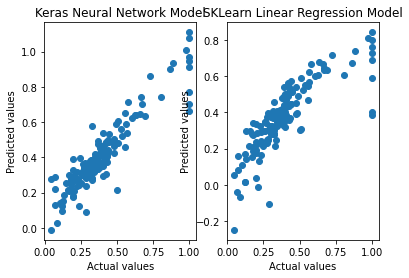

Linear Regression Model Mean Square Error
0.015159030964982015


In [8]:
#Multiple Linear Regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

LModel = LinearRegression()
LModel.fit(X_train, Y_train)

Y_predLM = LModel.predict(X_test)

plt.figure(1)
plt.subplot(121)
plt.scatter(Y_test, Y_predKM)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Keras Neural Network Model")

plt.subplot(122)
plt.scatter(Y_test, Y_predLM)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Linear Regression Model")
plt.show()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_predLM)
print('Linear Regression Model Mean Square Error')
print(mse)